In [ ]:
!python -m pip install trdg


In [56]:
import trdg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import glob,os


In [86]:
!ls /home/ubuntu/project/fonts

Arimo		    Fredoka_One      Noto_Sans.zip  Oswald.zip	   Roboto
Arimo.zip	    Fredoka_One.zip  Open_Sans	    Patua_One	   Roboto.zip
Dancing_Script	    LICENSE.txt      Open_Sans.zip  Patua_One.zip  Ubuntu
Dancing_Script.zip  Noto_Sans	     Oswald	    PT_Serif.zip   Ubuntu.zip


In [87]:
font_list=glob.glob("/home/ubuntu/project/fonts/Arimo/*.ttf")
os.path.split(font_list[0])[0].split('/')[-1]


'Arimo'

In [90]:
import PIL  
from trdg.generators import (
    GeneratorFromDict,
    GeneratorFromRandom,
    GeneratorFromStrings,
    GeneratorFromWikipedia,
)

# The generators use the same arguments as the CLI, only as parameters
BASE_DIR=os.getcwd()

for fonts in font_list:
    generator = GeneratorFromStrings(
        ["Hello, World!"],
    #     blur=2,
    #     random_blur=True
        background_type=0,
        fonts=[fonts],
        size=32
    )
    # project/TextRecognitionDataGenerator/trdg/fonts/ar/NotoSansArabic-Regular.ttf

    count=0
    imdir=BASE_DIR+"/dataset/"+os.path.split(fonts)[0].split('/')[-1]
    os.makedirs(imdir,exist_ok=True)
    for img, lbl in generator:
        # Do something with the pillow images here.
        count+=1
        print(count)
        print(lbl,img.size)
        imname=os.path.split(fonts)[1].split(".")[0]+str(count)+".jpg"
        img = img.save(os.path.join(imdir,imname)) 
        
        break
    

1
Hello, World! (138, 32)
1
Hello, World! (133, 32)


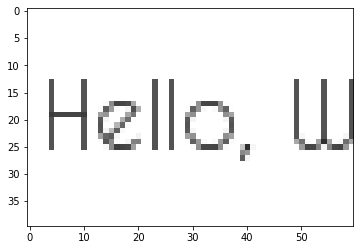

In [83]:
def text_masked_image(font_dir):
    height,width,_=40,60,3
    blank_image = np.ones((height,width,3), np.uint8)*255
    img = Image.fromarray(blank_image.astype('uint8'), 'RGB')


    font_size=16
    for font_path in font_dir:

        fnt = ImageFont.truetype(font_path, font_size,index=0,encoding='armn')
        d = ImageDraw.Draw(img)
        
        d.text((3,height/2-10), "Hello, World!", font=fnt, fill=(0, 0, 0))
        open_cv_image = np.array(img) 
        # Convert RGB to BGR 
        open_cv_image = open_cv_image[:, :, ::-1].copy() 
    return open_cv_image
font_dir=["/home/ubuntu/project/TextRecognitionDataGenerator/trdg/fonts/latin/CaviarDreams.ttf"]

plt.imshow(text_masked_image(font_dir), alpha=0.9)

In [ ]:
project/TextRecognitionDataGenerator/trdg/fonts/latin/CaviarDreams.ttf